# CIFAR10 Dataset Using KNN Algorithm

### Description:
Images were read from the train folder to ensure there were no damaged ones. Each picture from each class was then saved as a tuple with the same class name, with the first element being the image's flattened 1-d array and the second being the co-responding class name. Then, all of the class tuples were combined. Then, two lists were made, one containing arrays of photos and the other containing labels. They were then transformed into numpy arrays.Same steps were conducted with test data. Then knn was applied with L1 distance and here the value of k was 5. Then knn was applied with different values of k and with spliting the training data into 5 folds. Lastly, the variations of accuracies were shown by ploting them. I tried to plot the accuracies for dofferent folds with L1 distance too. But it took so much time for computing in this way and even after an hour it hadn't finished computing.

## Installing opencv

In [1]:
pip install opencv_contrib_python

Note: you may need to restart the kernel to use updated packages.


## Installing tqdm

In [2]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


## Installing Pakage

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import math 
import random

# Load image datasets to train_data array

In [4]:
TRAIN_DIR = r'D:\CVPR\CIFAR-10-images\train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append({
            'image': img_arr,
            'class': class_num
        })
print(len(TRAIN_DATA))

100%|██████████| 5000/5000 [00:23<00:00, 211.73it/s]

50000


# Suffle the data

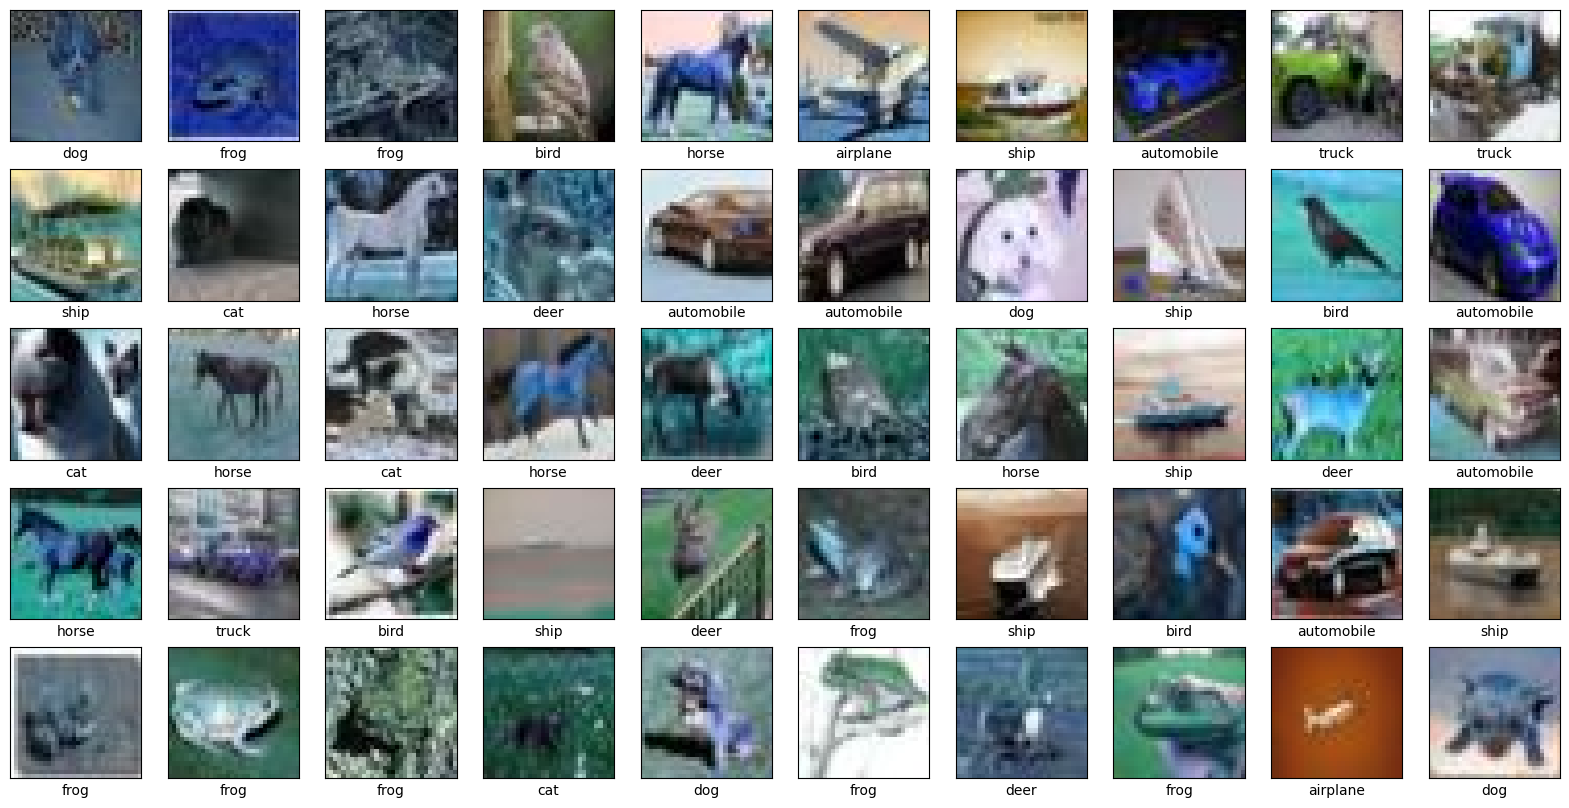

In [6]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i]['image'])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i]['class']])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

# Using Dataset folding and define train data split function

In [7]:
# folding data
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

def train_test_split(X, y, test_size=0.2):
    X_train = X[:int(len(X)*(1-test_size))]
    X_test = X[int(len(X)*(1-test_size)):]
    y_train = y[:int(len(y)*(1-test_size))]
    y_test = y[int(len(y)*(1-test_size)):]
    return X_train, X_test, y_train, y_test

# KNN Manhattan Distance Calculation

In [8]:
def l1_distance(test,k):    
    x=[]

    for i in range(0,len(TRAIN_DATA)):
        x.append(np.sum(abs(np.subtract(TRAIN_DATA[i][0].flatten(),test.flatten()))))

    for j in (np.argsort(x)[:k]):
        for i in (range(0,len(TRAIN_DATA))):
            if np.sum(abs(np.subtract(TRAIN_DATA[i][0].flatten(),test.flatten())))==x[j]:
                print(CATEGORIES[TRAIN_DATA[i][1]])
                break

# Predicting a Single Test Image

In [9]:
def l1_distance_accuracy(test,k):    
    x=[]
    prediction_array = []
    for i in range(0,len(TRAIN_DATA)):
        x.append(np.sum(abs(np.subtract(TRAIN_DATA[i][0].flatten(),test.flatten()))))

    for j in (np.argsort(x)[:k]):
        for i in (range(0,len(TRAIN_DATA))): #for i in tqdm(range(0,len(train_data))):
            if np.sum(abs(np.subtract(TRAIN_DATA[i][0].flatten(),test.flatten())))==x[j]:
                #print(CATEGORIES[train_data[i][1]])
                prediction_array.append(TRAIN_DATA[i][1])
                break

    #print(prediction_array)
    
    check = []
    for i in range(0, len(CATEGORIES)):
        a = 0
        for j in range(0, k):
            if i == prediction_array[j]:
                a = a+1
        check.append(a)
            
    for final_prediction in range(0,len(CATEGORIES)):
        if check[final_prediction] == max(check):
            #print('Prediction : ' +CATEGORIES[final_prediction])
            return final_prediction

# Define KNN Class 
-  K = number of neighbors

- fit = function that accept X (observed data/Features), y (target data/result)

- predict = function that accepts X_test is the test datasets, l_function = "l2" and "l1"

- accurecy = check the how many actually prediction it can predict [0-1]

In [11]:
class KNeighborClassifer:
    k = None

    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def accuracy(self, y_actual, y_pred):
        return np.sum(y_actual == y_pred) / len(y_actual)
    
    def predict(self, X_test, l_func = "l2"):
        y_predtion = [] 
        i = 0
        for x in tqdm(X_test):
            distances = []
            for i in range(len(self.X)):
                if l_func == "l2":
                    distance = np.sqrt(np.sum((x - self.X[i])**2))
                    distances.append({
                        'distance': distance,
                        'class': self.y[i]
                    })
                elif l_func == "l1":
                    distance = np.sum(np.abs(x - self.X[i]))
                    distances.append({
                        'distance': distance,
                        'class': self.y[i]
                    })
            distances.sort(key=lambda x: x['distance'])
            k_nearest = distances[:self.k]
            k_nearest_classes = [x['class'] for x in k_nearest]
            y_predtion.append(max(set(k_nearest_classes), key=k_nearest_classes.count))
        return y_predtion
        

# k neighbours value starts from 1 - 10
Plot the accuracy l1 vs l2 in graph

In [12]:

X = np.array([i['image'] for i in TRAIN_DATA[:5000]])
y = np.array([i['class'] for i in TRAIN_DATA[:5000]])

l1_accuracies = {}
l2_accuracies = {}

k_neighbors = np.arange(1, 10)

for k in tqdm(k_neighbors):
    knn = KNeighborClassifer(k)
    
    X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    knn.fit(X_train, y_train)

    y_pred_l1 = knn.predict(X_test, l_func="l1")
    y_pred_l2 = knn.predict(X_test, l_func="l2")

   
    l1_accuracies[k] = knn.accuracy(y_test, y_pred_l1)
    l2_accuracies[k] = knn.accuracy(y_test, y_pred_l2)

    print(f"for k = {k} l1 accuracy is {l1_accuracies[k]} and l2 accuracy is {l2_accuracies[k]}")
    print(f"for k = {k} l1 accuracy is {l1_accuracies[k]} and l2 accuracy is {l2_accuracies[k]}")



100%|██████████| 1000/1000 [00:54<00:00, 18.43it/s][A

 11%|█         | 1/9 [01:58<15:50, 118.80s/it]

for k = 1 l1 accuracy is 0.206 and l2 accuracy is 0.18
for k = 1 l1 accuracy is 0.206 and l2 accuracy is 0.18



100%|██████████| 1000/1000 [00:55<00:00, 17.94it/s]

 22%|██▏       | 2/9 [03:56<13:48, 118.36s/it]

for k = 2 l1 accuracy is 0.204 and l2 accuracy is 0.176
for k = 2 l1 accuracy is 0.204 and l2 accuracy is 0.176



100%|██████████| 1000/1000 [00:55<00:00, 17.97it/s][A

 33%|███▎      | 3/9 [06:00<12:05, 120.98s/it]

for k = 3 l1 accuracy is 0.203 and l2 accuracy is 0.166
for k = 3 l1 accuracy is 0.203 and l2 accuracy is 0.166



100%|██████████| 1000/1000 [00:55<00:00, 17.92it/s][A

 44%|████▍     | 4/9 [08:09<10:19, 123.96s/it]

for k = 4 l1 accuracy is 0.222 and l2 accuracy is 0.173
for k = 4 l1 accuracy is 0.222 and l2 accuracy is 0.173



100%|██████████| 1000/1000 [00:57<00:00, 17.40it/s]

 56%|█████▌    | 5/9 [10:08<08:09, 122.27s/it]

for k = 5 l1 accuracy is 0.229 and l2 accuracy is 0.196
for k = 5 l1 accuracy is 0.229 and l2 accuracy is 0.196



100%|██████████| 1000/1000 [00:58<00:00, 17.16it/s][A

 67%|██████▋   | 6/9 [12:11<06:07, 122.56s/it]

for k = 6 l1 accuracy is 0.235 and l2 accuracy is 0.19
for k = 6 l1 accuracy is 0.235 and l2 accuracy is 0.19



100%|██████████| 1000/1000 [00:54<00:00, 18.41it/s]

 78%|███████▊  | 7/9 [14:13<04:04, 122.17s/it]

for k = 7 l1 accuracy is 0.221 and l2 accuracy is 0.191
for k = 7 l1 accuracy is 0.221 and l2 accuracy is 0.191



100%|██████████| 1000/1000 [00:54<00:00, 18.37it/s][A

 89%|████████▉ | 8/9 [16:13<02:01, 121.64s/it]

for k = 8 l1 accuracy is 0.208 and l2 accuracy is 0.185
for k = 8 l1 accuracy is 0.208 and l2 accuracy is 0.185



100%|██████████| 1000/1000 [00:55<00:00, 17.91it/s][A

100%|██████████| 9/9 [18:19<00:00, 122.18s/it]

for k = 9 l1 accuracy is 0.223 and l2 accuracy is 0.19
for k = 9 l1 accuracy is 0.223 and l2 accuracy is 0.19


# Ploting accuracy L1 Vs L2 Distance

- L1 distance describes manhatten distance
- L2 distance describes eucledian distance

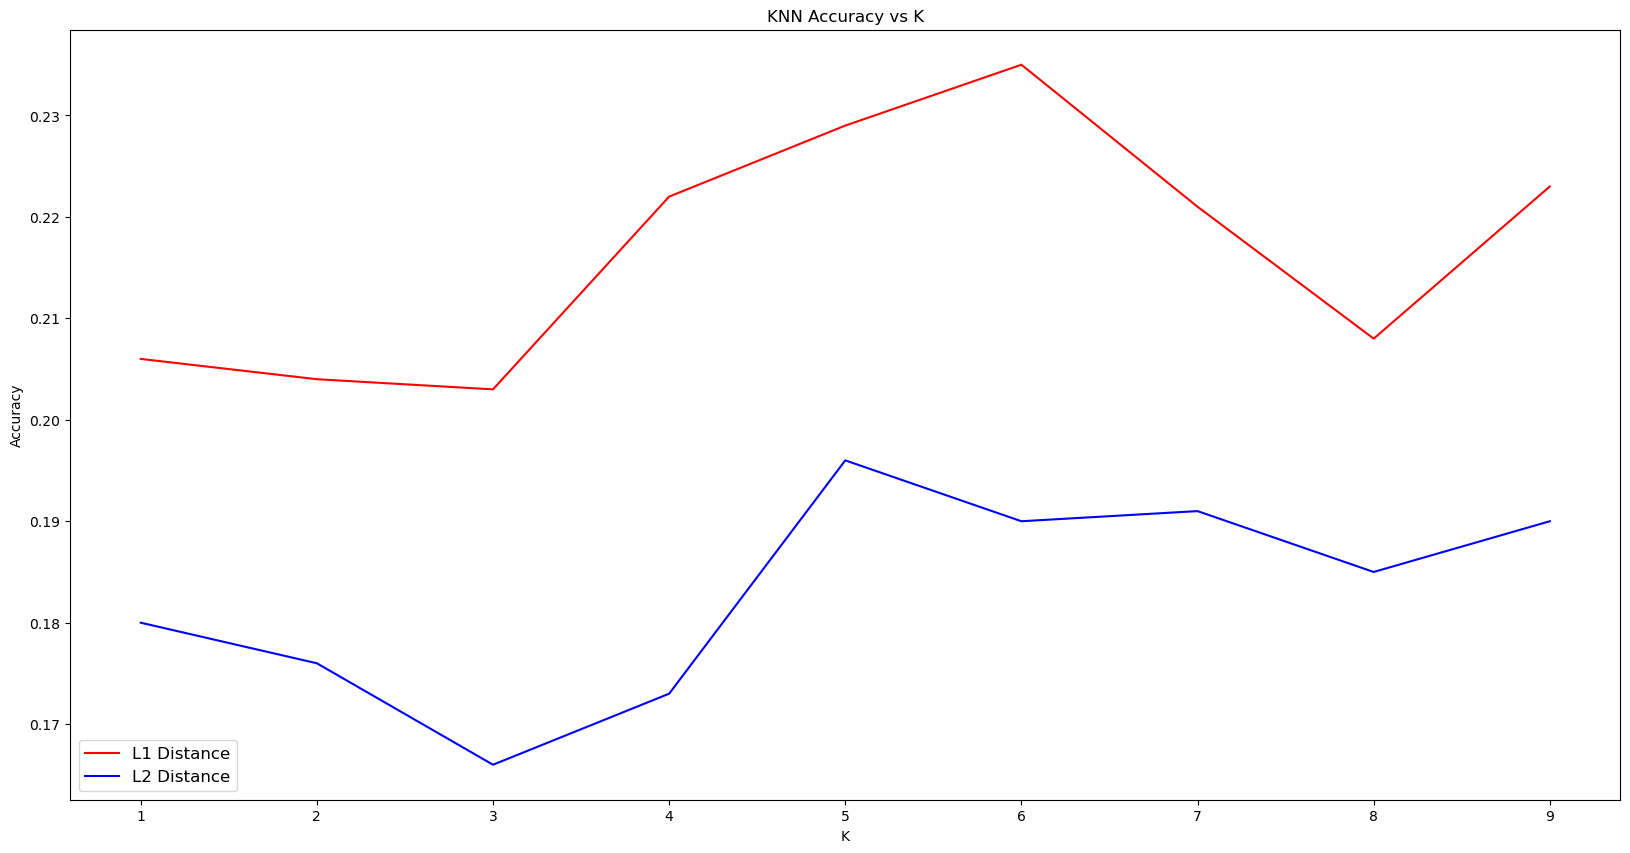

In [13]:
plt.figure(figsize=(20,10))
plt.title("KNN Accuracy vs K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(k_neighbors, list(l1_accuracies.values()), label="L1 Distance", color="red")
plt.plot(k_neighbors, list(l2_accuracies.values()), label="L2 Distance", color="blue")
plt.xticks(k_neighbors)
plt.legend([
    "L1 Distance",
    "L2 Distance"
], loc="lower left", fontsize=12)
plt.show()

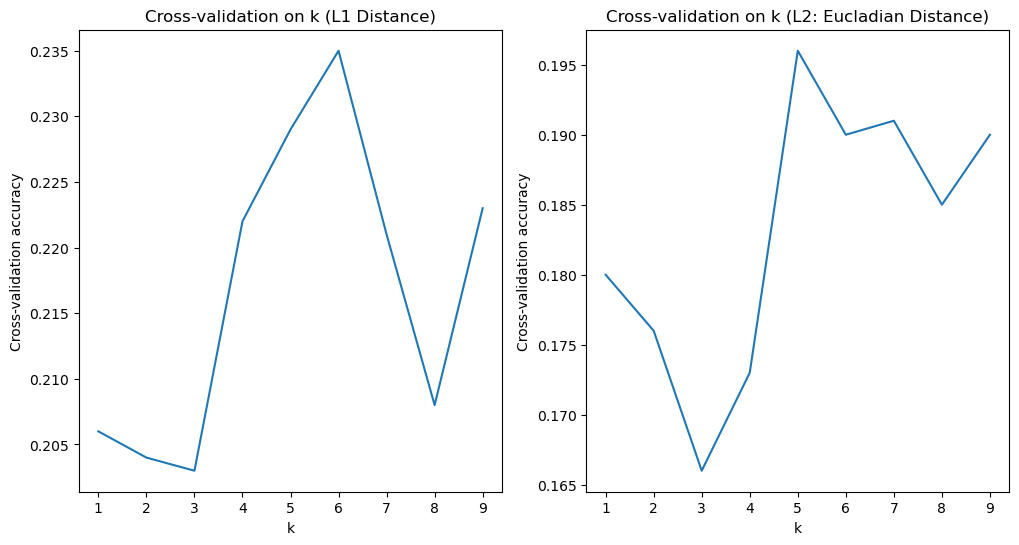

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for L1 distance
for a in k_neighbors:
    accuracies2 = l1_accuracies.values()
    

accuracies_mean = np.array([np.mean(v) for k,v in sorted(l1_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(l1_accuracies.items())])
ax1.errorbar(k_neighbors, accuracies_mean, yerr=accuracies_std)
ax1.set_title('Cross-validation on k (L1 Distance)')
ax1.set_xlabel('k')
ax1.set_ylabel('Cross-validation accuracy')


# Plot for L2 distance
for a in k_neighbors:
    accuracies2 = l2_accuracies.values()
    

accuracies_mean = np.array([np.mean(v) for k,v in sorted(l2_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(l2_accuracies.items())])
ax2.errorbar(k_neighbors, accuracies_mean, yerr=accuracies_std)
ax2.set_title('Cross-validation on k (L2: Eucladian Distance)')
ax2.set_xlabel('k')
ax2.set_ylabel('Cross-validation accuracy')

plt.show()



In [15]:
def bestAccuracy(accuracies):
    best_k = max(accuracies, key=accuracies.get)
    bestAccuracy = accuracies[best_k]
    return best_k, bestAccuracy

best_k_l1, bestAccuracy_l1 = bestAccuracy(l1_accuracies)
best_k_l2, bestAccuracy_l2 = bestAccuracy(l2_accuracies)

print(f"Best K for L1 Distance is {best_k_l1} with accuracy {bestAccuracy_l1}")

Best K for L1 Distance is 6 with accuracy 0.235
